In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the dataset
df = pd.read_csv("Bengaluru_House_Data.csv")

# Clean column names: remove spaces and special characters
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '', regex=True)

# Check the cleaned column names
df.columns
df.isnull().sum()
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [8]:
# Select only the numeric columns for median imputation
numeric_columns = df.select_dtypes(include=['number']).columns

# Impute missing values in numeric columns with the median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical columns, use the mode for imputation
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check for any remaining missing values
df.isnull().sum()


area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
# # Assuming there's another dataset 'neighborhood_info.csv' with neighborhood demographics
# neighborhood_df = pd.read_csv("neighborhood_info.csv")

# # Merge datasets based on a common column like 'neighborhood'
# df = pd.merge(df, neighborhood_df, on='neighborhood', how='left')


In [9]:
# Filter by size (e.g., '3 BHK')
df_filtered_size = df[df['size'] == '3 BHK']
print("\nFiltered by Size:")
print(df_filtered_size.head())

# Filter by price range (e.g., houses with price between 50,000,000 and 100,000,000)
df_filtered_price = df[(df['price'] >= 50000000) & (df['price'] <= 100000000)]
print("\nFiltered by Price Range:")
print(df_filtered_price.head())

# Subset the dataset for relevant columns (price, size, location, and area_type)
df_subset = df[['price', 'size', 'location', 'area_type']]
print("\nSubsetted Data (Relevant Columns):")
print(df_subset.head())



Filtered by Size:
               area_type   availability            location   size  society  \
2         Built-up  Area  Ready To Move         Uttarahalli  3 BHK  GrrvaGr   
3   Super built-up  Area  Ready To Move  Lingadheeranahalli  3 BHK  Soiewre   
8   Super built-up  Area  Ready To Move        Marathahalli  3 BHK  GrrvaGr   
10  Super built-up  Area         18-Feb          Whitefield  3 BHK  GrrvaGr   
16  Super built-up  Area  Ready To Move       Bisuvanahalli  3 BHK  Prityel   

   total_sqft  bath  balcony  price  
2        1440   2.0      3.0  62.00  
3        1521   3.0      1.0  95.00  
8        1310   3.0      1.0  63.25  
10       1800   2.0      2.0  70.00  
16       1180   3.0      2.0  48.00  

Filtered by Price Range:
Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price]
Index: []

Subsetted Data (Relevant Columns):
    price       size                  location             area_type
0   39.07      2 BHK  Elect

In [10]:
print(df.columns)


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [11]:
# Clean column names to remove spaces or special characters
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'\W', '', regex=True)

# Now try encoding again
df_encoded = pd.get_dummies(df, columns=['area_type', 'availability', 'location', 'society', ], drop_first=True)
print(df_encoded.head())

        size total_sqft  bath  balcony   price  area_type_Carpet  Area  \
0      2 BHK       1056   2.0      1.0   39.07                   False   
1  4 Bedroom       2600   5.0      3.0  120.00                   False   
2      3 BHK       1440   2.0      3.0   62.00                   False   
3      3 BHK       1521   3.0      1.0   95.00                   False   
4      2 BHK       1200   2.0      1.0   51.00                   False   

   area_type_Plot  Area  area_type_Super built-up  Area  availability_14-Nov  \
0                 False                            True                False   
1                  True                           False                False   
2                 False                           False                False   
3                 False                            True                False   
4                 False                            True                False   

   availability_15-Aug  ...  society_Xeitaa   society_YCnce R  \
0        

In [12]:
# Aggregate average sale price by location
avg_price_by_location = df.groupby('location')['price'].mean()

# Display the average price by location
print(avg_price_by_location)


location
 Anekal                  16.000000
 Banaswadi               35.000000
 Basavangudi             50.000000
 Bhoganhalli             22.890000
 Devarabeesana Halli    124.833333
                           ...    
t.c palya               160.000000
tc.palya                 60.750000
vinayakanagar           200.000000
white field,kadugodi    275.000000
whitefiled               32.730000
Name: price, Length: 1305, dtype: float64


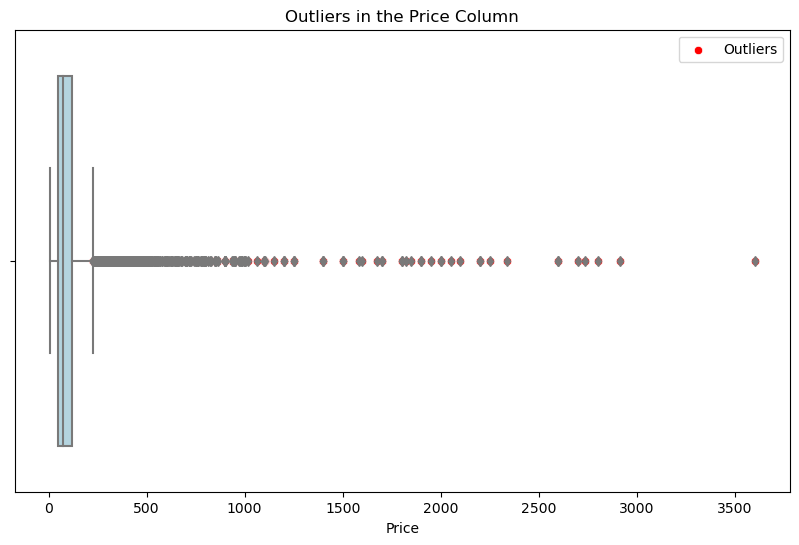

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightblue')
sns.scatterplot(x=outliers['price'], y=[0] * len(outliers), color='red', label='Outliers')

plt.title('Outliers in the Price Column')
plt.xlabel('Price')
plt.legend()
plt.show()
